<a href="https://colab.research.google.com/github/wtkns/dx451/blob/main/PythonImaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PYTHON IMAGING

In [ ]:
#Best practice for working with CoLab is to link your session to your Google Drive. 
#That way you do not lose files when your session expires.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Switch into your working directory

In [ ]:
import os

In [ ]:
import os
if not os.path.isdir('drive/MyDrive/Rules'):
  os.makedirs('drive/MyDrive/Rules/ImageFiles')
os.chdir("drive/MyDrive/Rules")
os.getcwd()

'/content/drive/MyDrive/Rules'

Some packages need to be installed before we can import them. To do this, we use pip (python package installer). Since we are not running pip inside python, we add a '!' before our command.

For this notebook, we are going to use the Python Imaging Library (PIL). Documentation is here: https://pillow.readthedocs.io/en/5.1.x/index.html

In [ ]:
! pip install pillow

--2022-02-03 20:28:30--  https://picsum.photos/200/300
Resolving picsum.photos (picsum.photos)... 104.26.4.30, 172.67.74.163, 104.26.5.30, ...
Connecting to picsum.photos (picsum.photos)|104.26.4.30|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://i.picsum.photos/id/702/200/300.jpg?hmac=mkz0etLNxZEtcZKYuBuDYD9KewX-7Tv_qsT6aFO0bCU [following]
--2022-02-03 20:28:30--  https://i.picsum.photos/id/702/200/300.jpg?hmac=mkz0etLNxZEtcZKYuBuDYD9KewX-7Tv_qsT6aFO0bCU
Resolving i.picsum.photos (i.picsum.photos)... 172.67.74.163, 104.26.4.30, 104.26.5.30, ...
Connecting to i.picsum.photos (i.picsum.photos)|172.67.74.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14170 (14K) [image/jpeg]
Saving to: ‘ImageFiles/random.jpg’

random.jpg          100%[===================>]  13.84K  --.-KB/s    in 0.002s  

2022-02-03 20:28:30 (7.51 MB/s) - ‘ImageFiles/random.jpg’ saved [14170/14170]



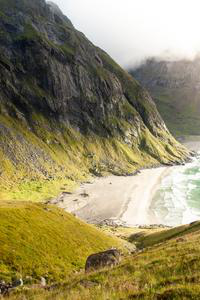

In [ ]:
from PIL import Image, ImageDraw, ImageFont

#Using PIL, we can open images and modify them
#First we need an image, here we download one and put it in a folder called ImageFiles. You can also do this manually.
if not os.path.isfile('ImageFiles/random.jpg'):
  !wget --directory-prefix=ImageFiles -O ImageFiles/random.jpg "https://picsum.photos/200/300"

im1 = Image.open('ImageFiles/random.jpg')
im1


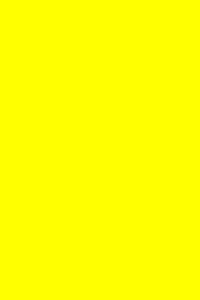

In [ ]:
#We can also generate images from scratch
im2 = Image.new(mode="RGB", size = (200,300), color="yellow")
im2

In [ ]:
#From either of these images we can create a layout template
#0,0 is top left
im2.paste((255,100,8), [25, 50, 175,275]) # (r,g,b), [left, top, right, bottom]
im2.paste((100,255,8), [50, 75, 150,250])
im2.paste((8,100,255), [75, 100, 125,225])
im2
im2.save(os.getcwd()+"/ImageFiles/random1.jpg")

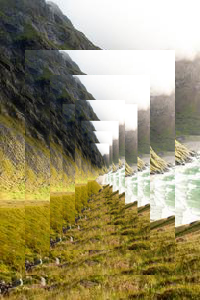

In [ ]:
#when working with saved images, we have to resize them to fit the box we're going to paste them into
im1.paste(im1.resize((150,225)), [25, 50, 175,275]) #[top_l_x, top_l_r, bottom_r_x, bottom_l_y]
im1.paste(im1.resize((100,175)), [50, 75, 150,250])
im1.paste(im1.resize((50,125)), [75, 100, 125,225])
im1

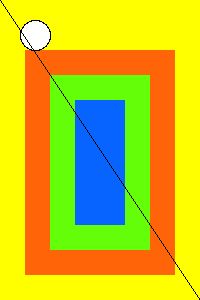

In [ ]:
#We can also add in geometry
draw = ImageDraw.Draw(im2)
draw.ellipse((20, 20, 50, 50), fill = 'white', outline ='black')
draw.line((0, 0) + im2.size, fill="black")
im2

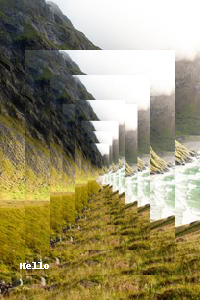

In [ ]:
#To add text
draw = ImageDraw.Draw(im1)
draw.text((20,260), "Hello", fill="White")
im1

In [ ]:
!fc-list

/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf: Liberation Sans Narrow:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf: Liberation Sans:style=Regular
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf: Liberation Mono:style=Bold Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf: Liberation Serif:style=Italic
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf: Liberation Mono:style=Bold
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf: Liberation Sans Narrow:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf: Liberation Serif:style=Bold
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf: Liberation Mono:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf: Liberation Sans:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf: Liberation Serif:style=Bold Italic
/usr/share/fonts/truet

/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf: Liberation Sans Narrow:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf: Liberation Sans:style=Regular
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf: Liberation Mono:style=Bold Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf: Liberation Serif:style=Italic
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf: Liberation Mono:style=Bold
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf: Liberation Sans Narrow:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf: Liberation Serif:style=Bold
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf: Liberation Mono:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf: Liberation Sans:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf: Liberation Serif:style=Bold Italic
/usr/share/fonts/truet

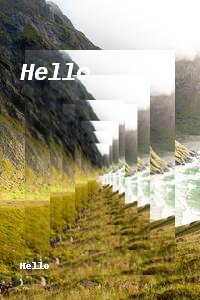

In [ ]:
#This command will tell you what fonts are available via colab
!fc-list

#To use a specfic font or size, we can provide a path to the font
fontpath = "/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf"

#Otherwise, you can download a ttf file and provide the google drive path to it

font_params = ImageFont.truetype(fontpath, 24)
draw.text((20,60), "Hello", font=font_params, fill="White")
im1

In [ ]:
#To create multiple variations of an image, we can create a repeat loop
import random
#ims = []
if not os.path.isdir('drive/MyDrive/Rules/ImageSequence/test1'):
  os.makedirs('ImageSequence/test1')
for i in range(10):
  im = Image.new(mode="RGB", size = (854,480), color="white")
  draw = ImageDraw.Draw(im)
  coord_x = random.randint(1,830)
  coord_y = random.randint(1,455)
  draw.ellipse((coord_x, coord_y, coord_x+20, coord_y+20), fill = 'black', outline ='black')
  im.save('ImageSequence/test1/image_'+str(i)+'.jpg')


**Exercises**

1. Review the notebook, make sure you understand how it works.
2. Create a new notebook and in it generate rules to implement a linear sequence of images, with a progressive pattern/formula. Experiment with images, colors, shapes, text.
3. Add conditional statements to generate a sequence that is different each time you run it.
4. Upload your notebook and examples of your image sequences to Canvas.
5. Repeat.
